# PHAS0056 Practical Machine Learning for Physicists

## Coursework 1: Curve Fitting

This notebook looks at using only the numpy library to attempt to fit a function to another function using a stochastic gradient descent algorithm.

Some of this code was inspired and adapted form the PHAS0056 Week 1 notebook, Week1_CurveFitting.

### Part 1: Fitting two 1st order polynomials

In [1]:
%matplotlib notebook 
#fuzzy plots?

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# defining the polynomial function with added noise
def polyModelWithNoise(x, theta, sigma):
    '''Returns a polynomial of the form y(x)=theta_i x^i + s, where s is noise, summed over i
    inputs:
    x: array of x values
    theta: array of polynomial coefficients
    sigma: paramter from which random noise is created from
    
    returns:
    array of polynomial values'''
    
    # creating the random noise, array of same size as x
    noise = np.random.normal(0, sigma, len(x))
    
    # initialise y values
    y = 0
    
    # for every paramter in the theta array, multiply it by x raised to the power of the polynomial number
    for i in range(len(theta)):
        y += theta[i] * x**i
        
    # and then add on the random noise    
    return y + noise

<IPython.core.display.Javascript object>


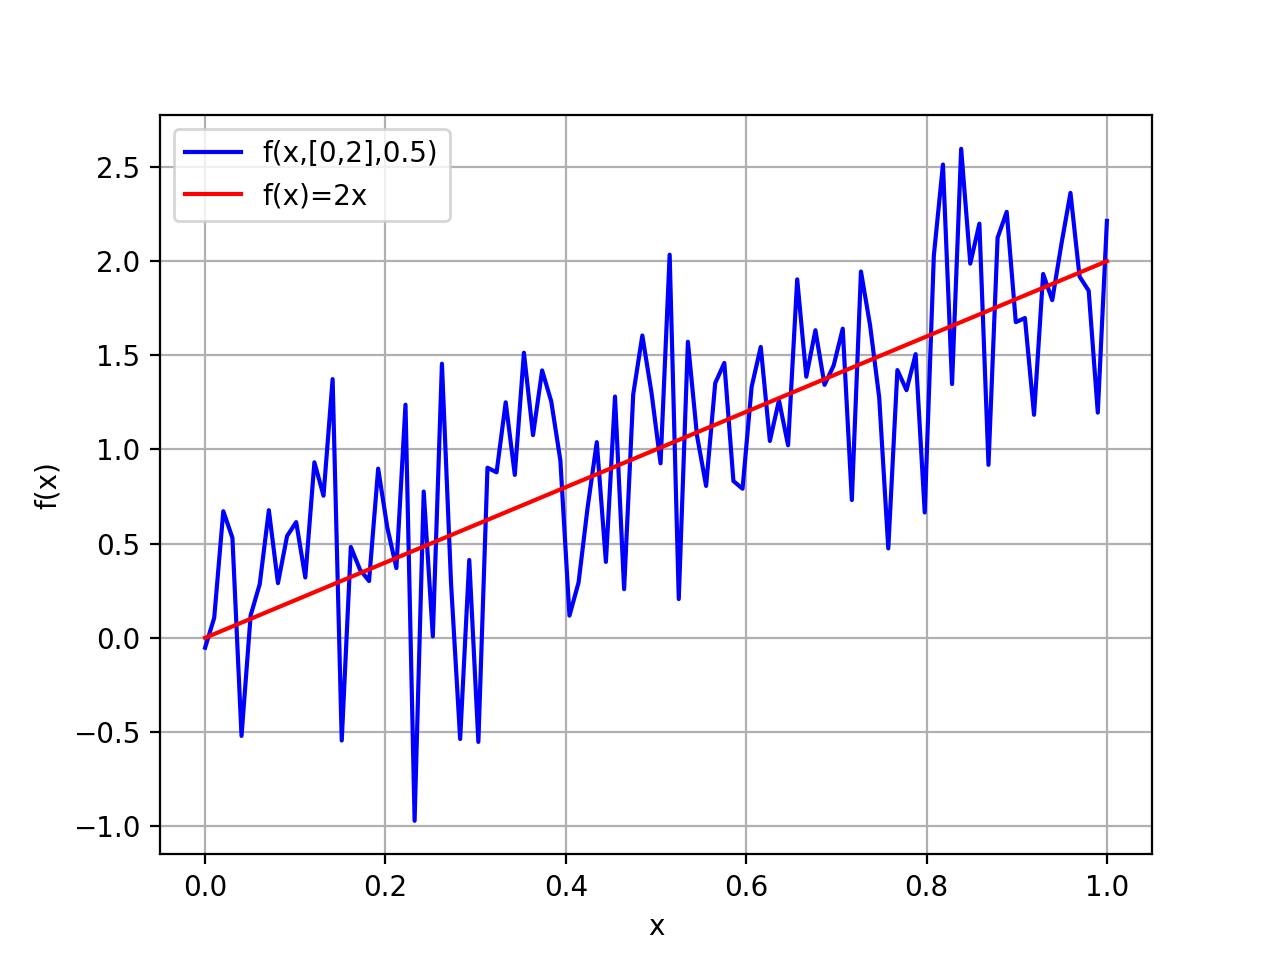

In [3]:
# plotting the polynomial with theta = [0,2] i.e. y=2x+sigma, as well as y=2x (no random noise)
plt.figure(1)

plt.plot(np.linspace(0,1,100),polyModelWithNoise(np.linspace(0,1,100),[0,2],0.5), color='blue', label=r'f(x,[0,2],0.5)')
plt.plot(np.linspace(0,1,100),polyModelWithNoise(np.linspace(0,1,100), [0,2],0), color='red', label=r'f(x)=2x')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(loc='best')

In [4]:
# getting the partial derivative arrays, which are just arrays of each x value raised to 0, then 1 then 2... up to
# size of theta, so a n-dimensional array
def polyGradient(x, theta):
    '''inputs:
        x: array of x values
        theta: array of parameters
       returns: gradient of f with respect to theta, an n-dimensional array, where n=size(theta), of sizes=len(x)'''

    # create the n-dimensional array, n is the length of the theta parameter array
    deriv = np.stack([x**i for i in range(len(theta))], axis=-1)

    # transpose the array to get the n-dimensional array
    return deriv.T

In [5]:
# get randomly samples x values
def samples(nsamples):
    '''Returns 10 randomly samples x values
    input:
    nsamples: number of samples wanted
    
    returns:
    array of 10 randomly samples x values'''
    
    return np.random.uniform(0, 1, 10)

In [6]:
# code adapted from Week1_CurveFitting Jupyter notebook

# average fake-chi squared (fake because sigma is set to 1)
def get_avg_fake_chisq(x, theta1, theta2, sigma):
    '''Returns avergae fake chi-squared
    
    inputs:
    x: array of x values
    theta: array of polynomial coefficients
    sigma: noise parameter'''
    
    return np.average((polyModelWithNoise(x, theta1, sigma) - polyModelWithNoise(x, theta2, sigma))**2)


def stochastic(theta1, theta2, sigma):
    '''performs stochastic gradient descent to minimise chi-squared
    inputs:
    theta1: starting theta paramters
    theta2: theta paramters of function to fit to
    sigma: noise parameter
    
    returns:
    chiSqArray: array of fake chi-squared value after each step
    thetaArray: array of theta paramters created after each step
    '''
    
    numSteps = 100 #number of steps in total
    eta = 0.5 #learning rate
    
    chiSqArray = np.zeros(numSteps) #initalising the array  
    thetaArray = np.zeros((numSteps+1,len(theta1))) #initialsing the array 
    thetaArray[0] = theta1 #start at the starting theta parameters

    for i in range(numSteps):
        
        x = samples(10) #get 10 random samples
        
        chiSq = get_avg_fake_chisq(x, theta1, theta2, sigma)  #get the fake chi-squared
        chiSqArray[i] = chiSq #put that chi-sqaured value in the array
        
        deviation= polyModelWithNoise(x, theta1, sigma) - polyModelWithNoise(x, theta2, sigma) #difference from
        #true function
        
        theta1-=eta*np.average(deviation[None,:] * polyGradient(x, theta1), axis=1)
        thetaArray[i+1] = theta1  
        
    return chiSqArray, thetaArray

In [7]:
theta1 = [-1, 0.5] #starting paramters
theta2 = [0, 2] #true parameters
sigma = 0.5 #noise
numSteps = 100 #to plot the chi-squared with
chiSqArray, thetaArray = stochastic(theta1, theta2, sigma)

<IPython.core.display.Javascript object>


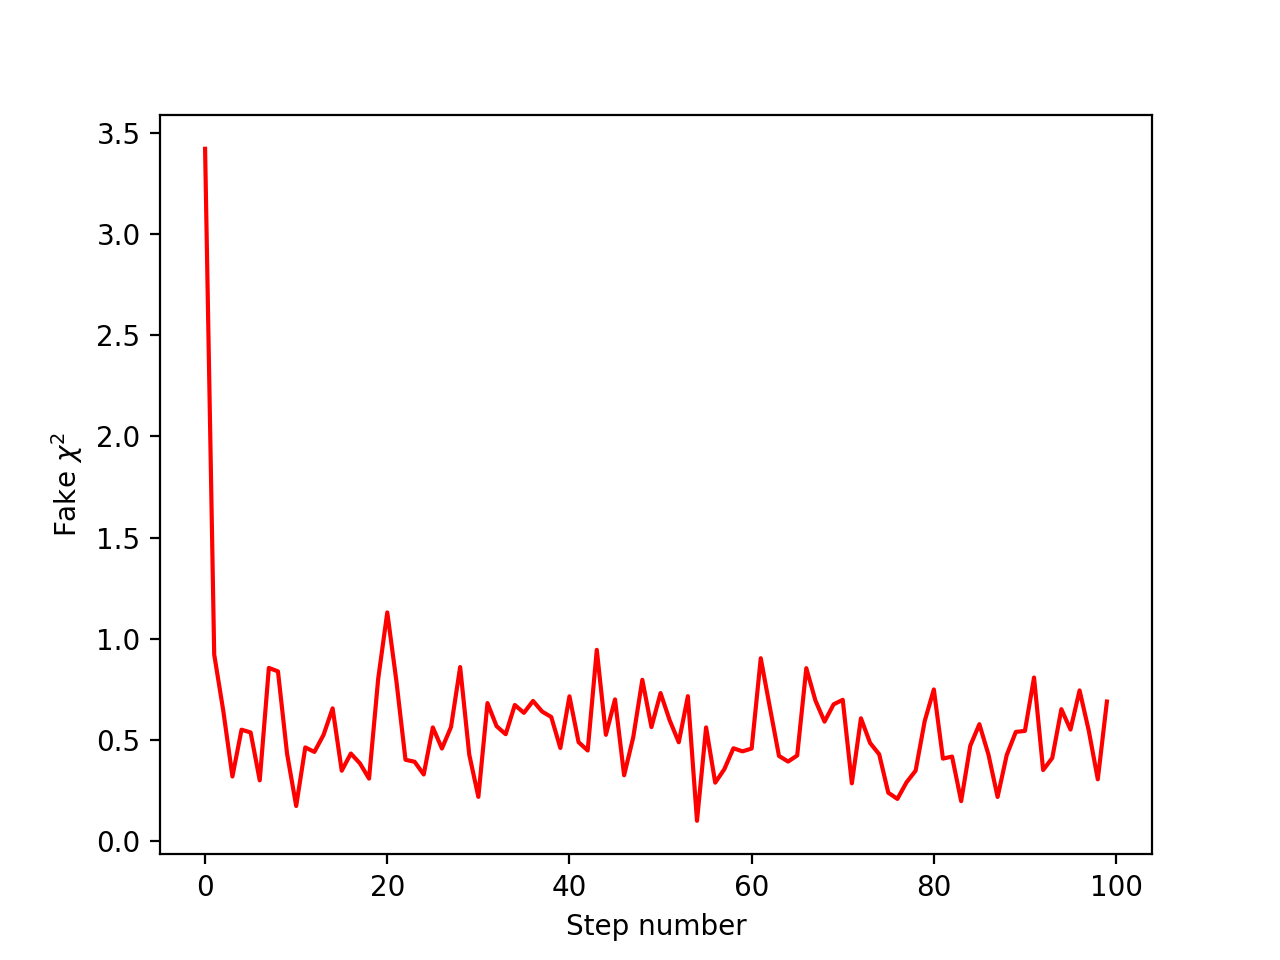

Text(0, 0.5, 'Fake $\\chi^{2}$')

In [8]:
plt.figure(2)

count = np.arange(numSteps+1) #getting x values for plotting
plt.plot((count[:-1]), chiSqArray, color='red')
plt.xlabel('Step number')
plt.ylabel(r'Fake $\chi^{2}$')

### Part 2: Fitting 1st, 3rd and 7th order polynomials

In [9]:
theta = np.array([0, 2, 2, 2]) #third order polynomial parameters

theta1 = 0.1 * np.arange(0,2) #1st order polynomial theta values
theta3 = 0.1 * np.arange(0,4) #3rd order polynomial theta values
theta7 = 0.1 * np.arange(0,8) #7th order polynomial theta values

In [10]:
chiSqArray1, thetaArray1 = stochastic(theta1,theta, 0.5)
chiSqArray3, thetaArray3 = stochastic(theta3,theta, 0.5)
chiSqArray7, thetaArray7 = stochastic(theta7,theta, 0.5)

<IPython.core.display.Javascript object>


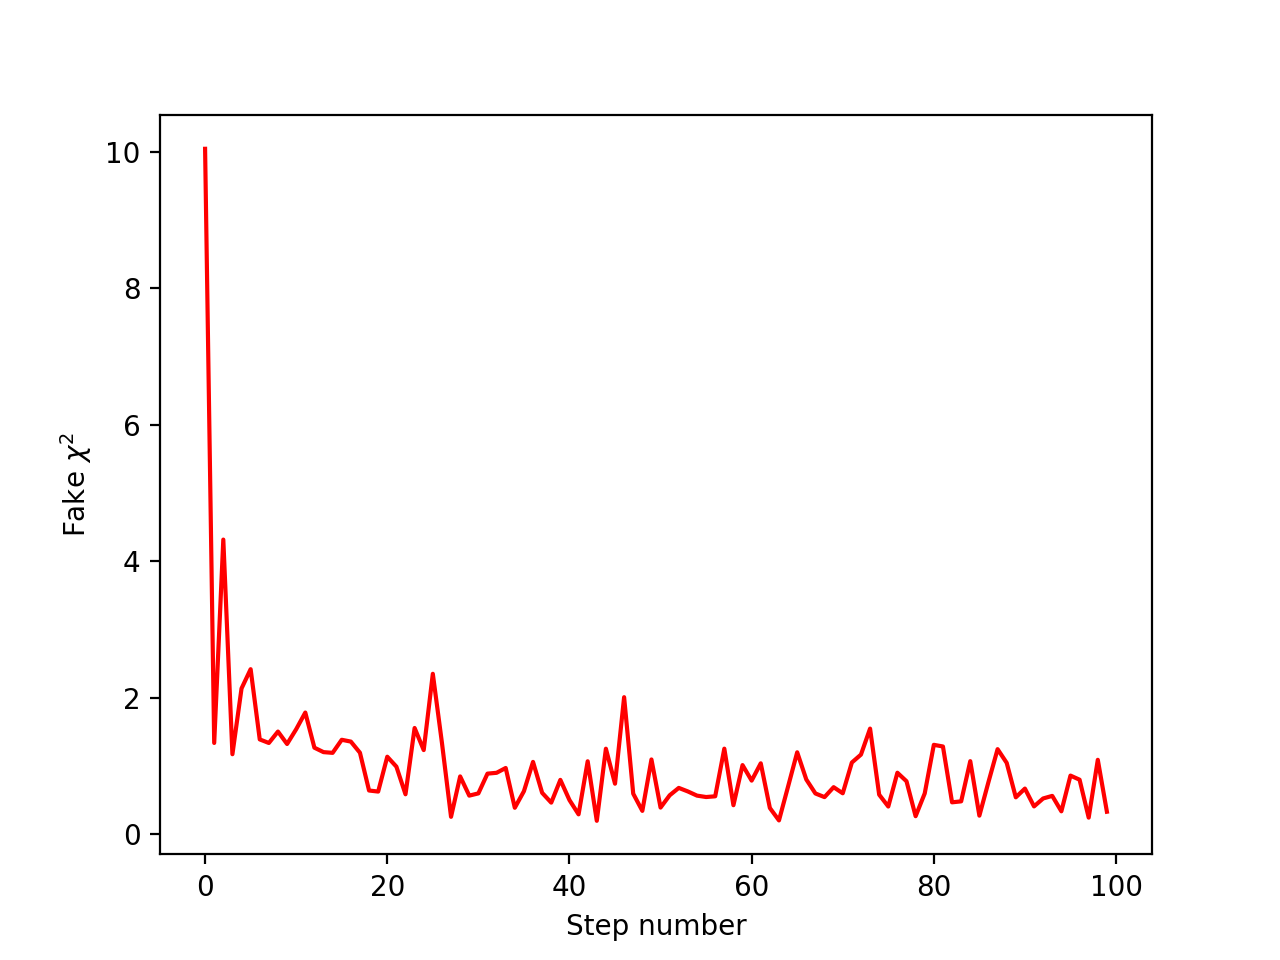

Text(0, 0.5, 'Fake $\\chi^{2}$')

In [11]:
plt.figure(3)
plt.plot(count[:-1], chiSqArray1, color='red')
plt.xlabel('Step number')
plt.ylabel(r'Fake $\chi^{2}$')

<IPython.core.display.Javascript object>


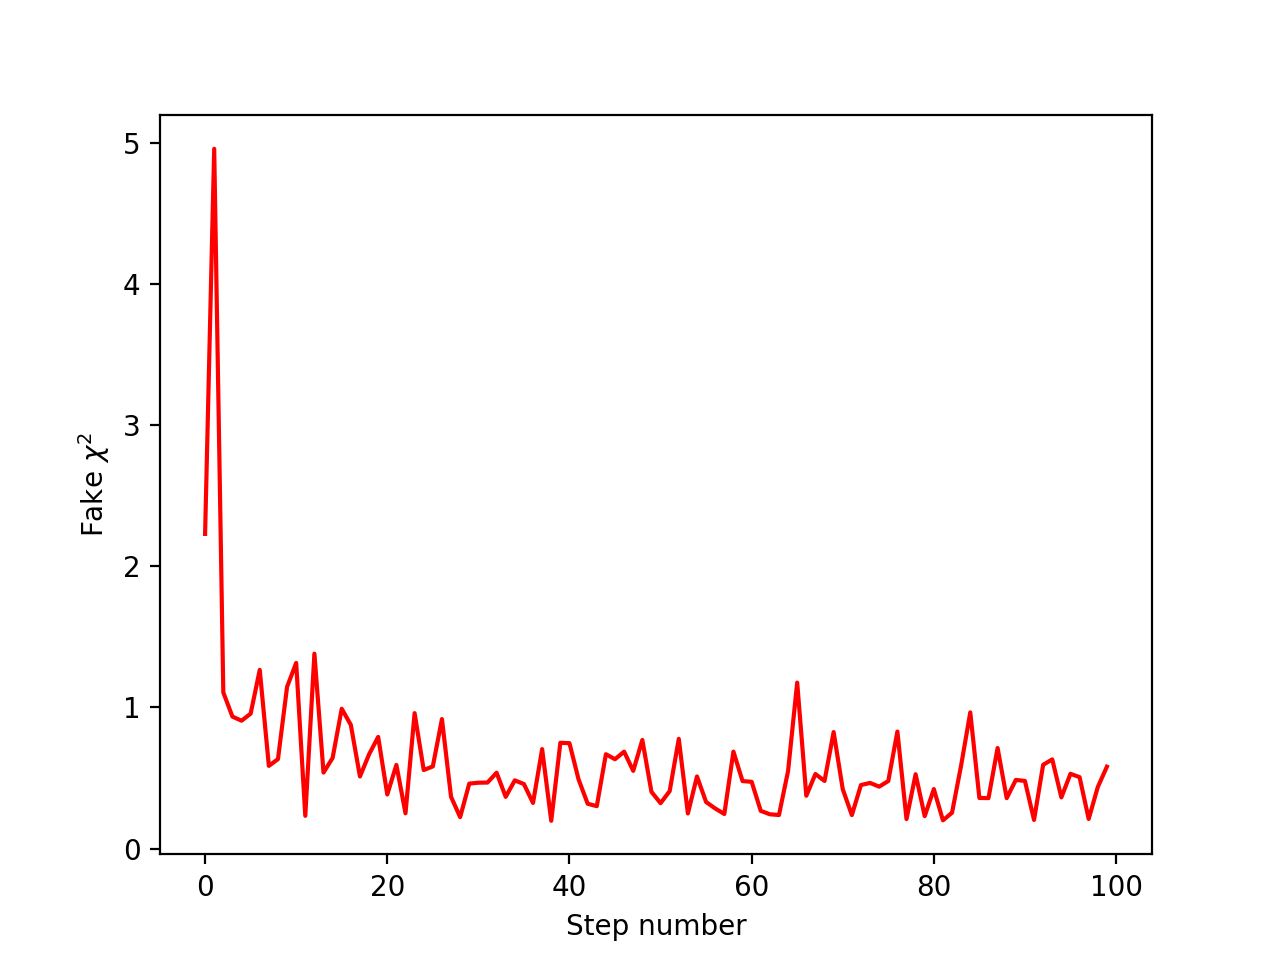

Text(0, 0.5, 'Fake $\\chi^{2}$')

In [12]:
plt.figure(4)
plt.plot(count[:-1], chiSqArray3, color='red')
plt.xlabel('Step number')
plt.ylabel(r'Fake $\chi^{2}$')

<IPython.core.display.Javascript object>


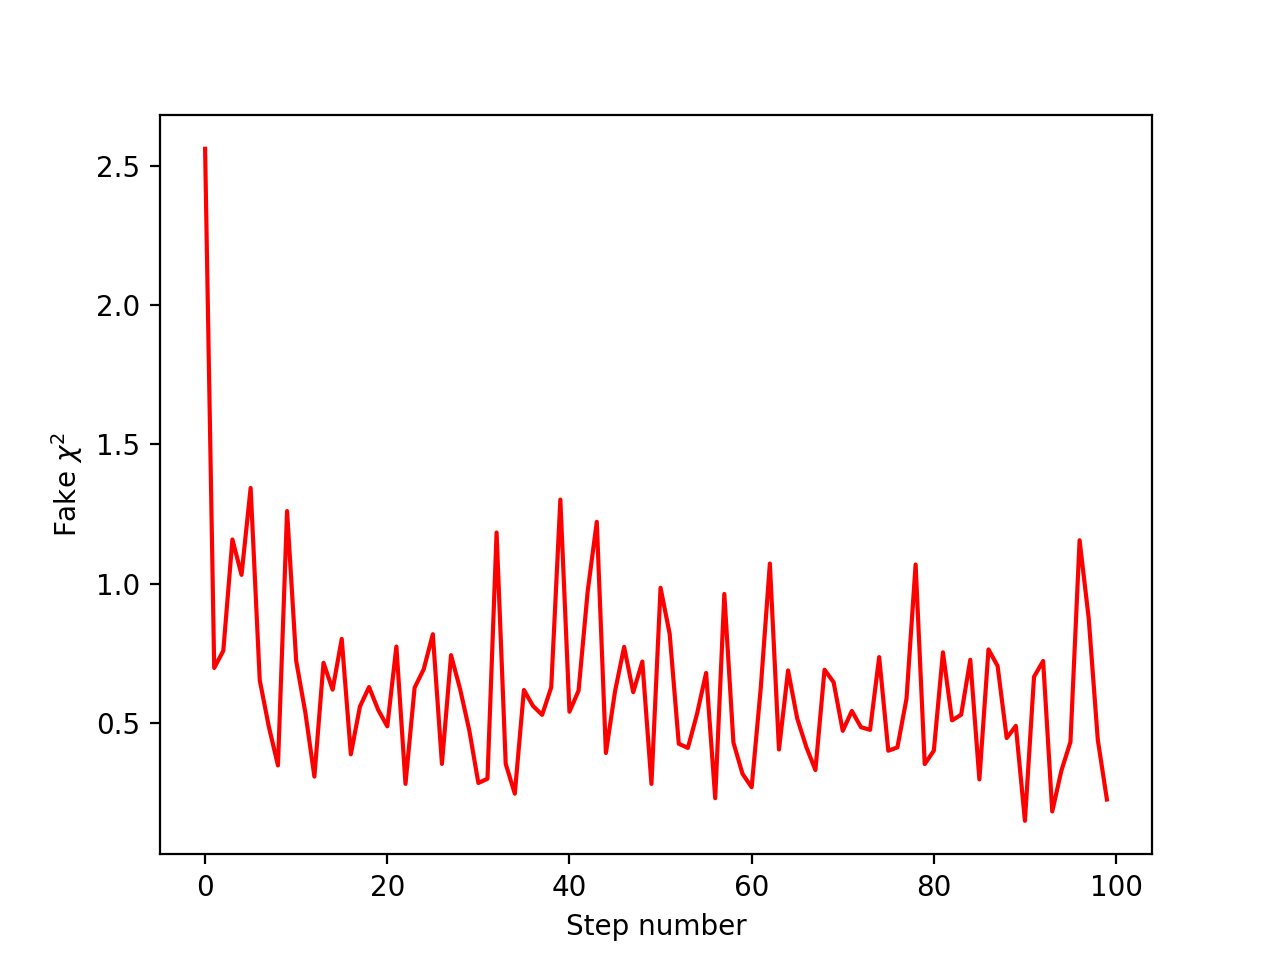

Text(0, 0.5, 'Fake $\\chi^{2}$')

In [13]:
plt.figure(5)
plt.plot(count[:-1], chiSqArray7, color='red')
plt.xlabel('Step number')
plt.ylabel(r'Fake $\chi^{2}$')

<IPython.core.display.Javascript object>


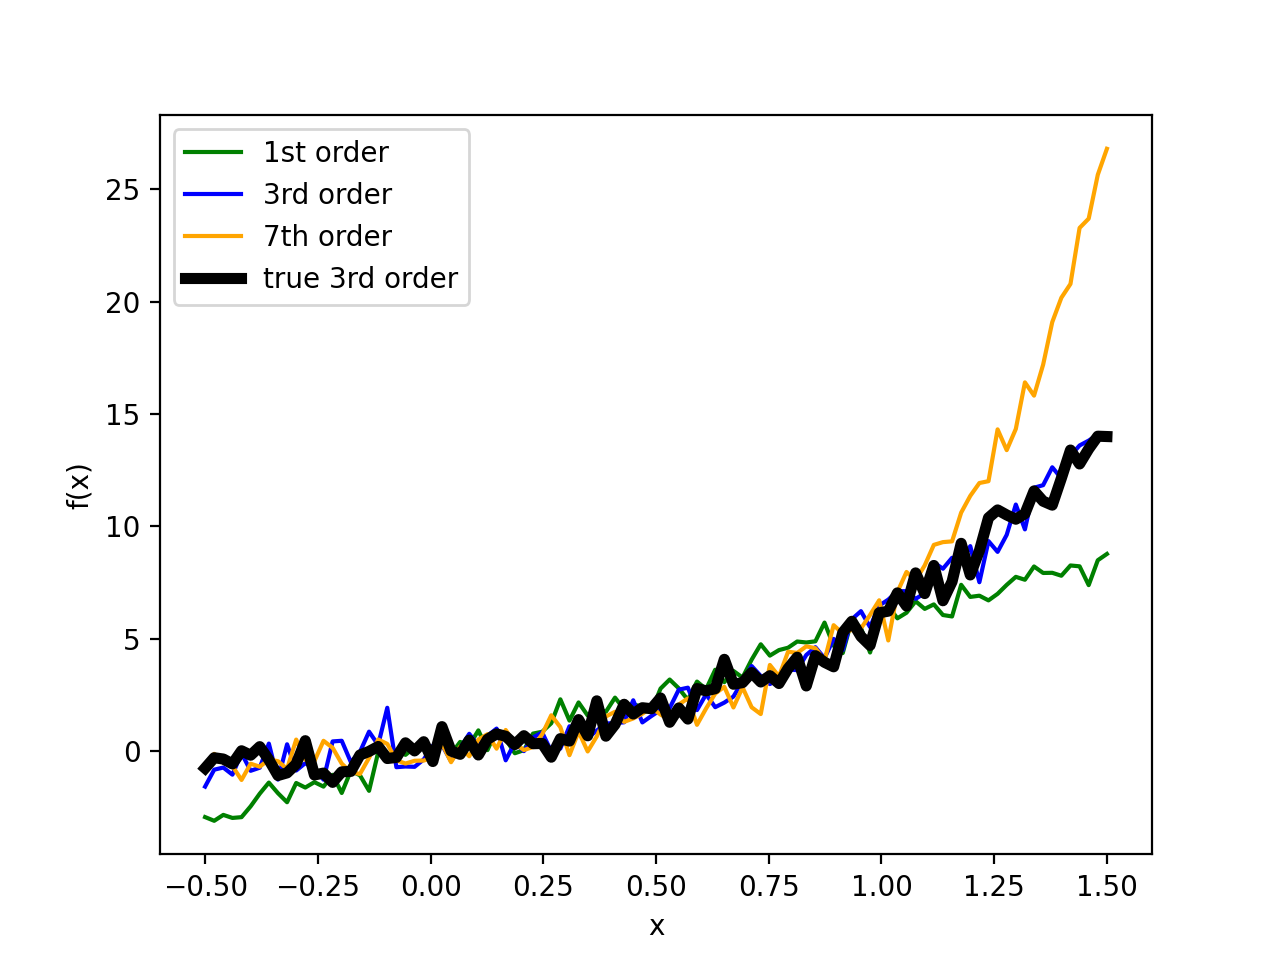

Text(0, 0.5, 'f(x)')

In [14]:
plt.figure(6)

xnew = np.linspace(-0.5,1.5,100)

plt.plot(xnew, polyModelWithNoise(xnew, thetaArray1[100], 0.5), color='green', label='1st order')
plt.plot(xnew, polyModelWithNoise(xnew, thetaArray3[100], 0.5), color='blue', label='3rd order')
plt.plot(xnew, polyModelWithNoise(xnew, thetaArray7[100], 0.5), color='orange', label='7th order')
plt.plot(xnew, polyModelWithNoise(xnew, theta, 0.5), linewidth=4, color='black',label='true 3rd order')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('f(x)')

For the regions the models weren't trained on, $x<0$ and $x>1$, the functions do not perform that well in generalising to the truth function. For $x<0$ especially, the 1st order polynomial does quite poor, which is expected because it's just a straight line and only knew to get close to values in the region $0 \leq x \leq 1$. For $x>1$, the 1st order performs like it did for $x<0$. Also in this region the 7th order polynomial deviates quite a bit. The 3rd order polynomial generally in all regions, trained and untrained, performs quite well which is expected because it is the same order polynomial as what we are fitting to.

From the graphs of the fake chi-squared values, the 3rd and 7th order perform better than the 1st order in generalsing to the true values, as the fake-chi-squared values get restricted to a small region, about between 0 to 1, whereas the 1st order still deviates quite a bit. Each time the code is ran the values of fake-chisquared change anyway as the noise is random and random samples are taken in the stochastic gradient descent.

Lowering the learning rate and increasing the number of steps will allow the models to generalise better in the regions they are trained in.

Nichol, R., "Week1_CurveFitting.ipynb", PHAS0056 Practical Machine Learning for Physicits, UCL Moodle, Week 1 content. Accessible: https://colab.research.google.com/github/nichol77/mlForPhysicists/blob/master/Week3/Week3_ImageCompression.ipynb